In [15]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import time

### Why AI at Nexora?

- At Nexora, AI is central to enhancing customer experiences by making interactions smarter, faster, and more personalized. This notebook demonstrates a mini recommendation system that leverages AI embeddings to match fashion products with a user’s style query. By turning product descriptions and queries into vector representations and ranking them via similarity, the system shows how AI can help users discover products they love, while also highlighting practical implementation steps, evaluation, and opportunities for future improvements.

### Data Preparation

In [85]:
# mock products
df = pd.read_csv('data.csv')

In [26]:
df

,name,desc
0,The Indian Garage Co Men's Cotton Regular Fit ...,Comfort : This light weight breathable premium...
1,Peter England Men's Everyday Solid Slim Fit Fu...,Product Type: Full Sleeves Formal Shirt Gender...
2,Levi's Men's 511 Slim Fit Mid Rise Navy Jeans,Material typeCotton.LengthStandard Length.Styl...
3,KLOSIA Women Embroidery Solid Anarkali Kurta a...,Elegant Design: Premium women’s kurta set with...
4,Alvami Women Anarkali Kurta and Pant Set With ...,★ Kurta and Pant set With Dupatta★ Product Mat...
5,GRECIILOOKS Women Trousers for Women | Women T...,Stylish Design: Textured trousers for women wi...
6,LEOTUDE Women's Cotton Oversized Fit T-Shirt,Neck Style: RoundSleeve Type: Half Sleeve | Dr...
7,Boho Dress,"Flowy, earthy tones for festival vibes"
8,GRECIILOOKS Women High Rise High Waist Trouser...,High Waist Design: Embrace a flattering silhou...
9,TAGAS Bear Graphic Sweatshirt for Women | Tren...,"Suitable for : All Season, Pattern Type: Print..."


### Embeddings

In [86]:
# openai api isn't free to use and my initial free credits have already expired. So, i am using all-MiniLM-L6-v2

In [33]:

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

2025-11-10 18:16:40.403666: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [59]:
embeddings = [model.encode(x[1][1]) for x in df.iterrows()]

/var/folders/gf/jln4qrcs5qb4c5ywqfg9qmsr0000gn/T/ipykernel_994/3966731881.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  embeddings = [model.encode(x[1][1]) for x in df.iterrows()]


In [109]:
# the dimention of all-MiniLM is significantly less than openAI embeddings so rec system 
# results will also be inferior.

print(len(embeddings))
print(embeddings[0].shape)

10
(384,)


### Cosine Similarity

In [69]:

query = "energetic urban chic"

embed_query = model.encode(query)

similarity_scores  = [cosine_similarity(x.reshape(1,-1),embed_query.reshape(1,-1)) for x in embeddings]


In [77]:
# creating 2d array with [ idx of product, its embedding, its score ]

idx_sim = [[idx,x,y] for idx,[x,y] in enumerate(zip(embeddings,similarity_scores))]

In [79]:
idx_sim.sort(key=lambda x:x[2],reverse=True)

### Test and Eval

In [88]:
#top 3 scores

for x in idx_sim[:3]:
    print(f"Product: {df.iloc[x[0]]}\n Score:{x[2]}\n\n")

Product: name                                Boho Dress
desc    Flowy, earthy tones for festival vibes
Name: 7, dtype: object
 Score:[[0.35246643]]


Product: name    The Indian Garage Co Men's Cotton Regular Fit ...
desc    Comfort : This light weight breathable premium...
Name: 0, dtype: object
 Score:[[0.1690577]]


Product: name         LEOTUDE Women's Cotton Oversized Fit T-Shirt
desc    Neck Style: RoundSleeve Type: Half Sleeve | Dr...
Name: 6, dtype: object
 Score:[[0.1349001]]




In [118]:
# func to do all above

def get_top_3(query, embeddings, df, threshold=0):
    embed_query = model.encode(query)
    
    similarity_scores  = [cosine_similarity(x.reshape(1,-1),embed_query.reshape(1,-1)) for x in embeddings]
    
    idx_sim = [[idx,x,y] for idx,[x,y] in enumerate(zip(embeddings,similarity_scores))]
    
    idx_sim.sort(key=lambda x:x[2],reverse=True)
    
    flag = 1
    for x in idx_sim[:3]:
        if x[2]>threshold:
            flag = 0
            print(f"Product: {df.iloc[x[0]]}\n Score:{x[2]}\n\n")
    
    if flag:
        print("No good match found.")

In [116]:
# query 1
query = "energetic urban chic"
get_top_3(query,embeddings,df, 0)

Product: name                                Boho Dress
desc    Flowy, earthy tones for festival vibes
Name: 7, dtype: object
 Score:[[0.35246643]]


Product: name    The Indian Garage Co Men's Cotton Regular Fit ...
desc    Comfort : This light weight breathable premium...
Name: 0, dtype: object
 Score:[[0.1690577]]


Product: name         LEOTUDE Women's Cotton Oversized Fit T-Shirt
desc    Neck Style: RoundSleeve Type: Half Sleeve | Dr...
Name: 6, dtype: object
 Score:[[0.1349001]]




In [96]:
# query 2
query = "Full sleeved formal shirt"
get_top_3(query,embeddings,df, 0.7)

Product: name    Peter England Men's Everyday Solid Slim Fit Fu...
desc    Product Type: Full Sleeves Formal Shirt Gender...
Name: 1, dtype: object
 Score:[[0.7145911]]




In [108]:
# query 3
query = "high waist trouser pants for women"
get_top_3(query,embeddings,df, 0.7)

Product: name    GRECIILOOKS Women High Rise High Waist Trouser...
desc    High Waist Design: Embrace a flattering silhou...
Name: 8, dtype: object
 Score:[[0.8224076]]




In [ ]:
# plotting latency

No good match found.
Product: name    Peter England Men's Everyday Solid Slim Fit Fu...
desc    Product Type: Full Sleeves Formal Shirt Gender...
Name: 1, dtype: object
 Score:[[0.7145911]]


Product: name    GRECIILOOKS Women High Rise High Waist Trouser...
desc    High Waist Design: Embrace a flattering silhou...
Name: 8, dtype: object
 Score:[[0.8224076]]




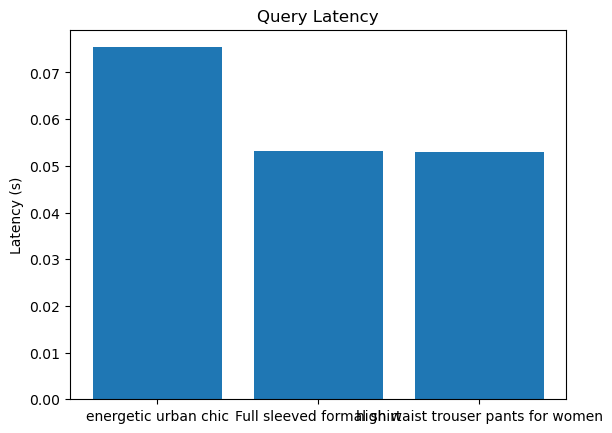

In [127]:


test_queries = ["energetic urban chic","Full sleeved formal shirt","high waist trouser pants for women"]

latencies = []
for query in test_queries:
    start = time.time()
    get_top_3(query,embeddings,df, 0.7)
    end = time.time()
    latencies.append(end-start)

plt.bar(test_queries, latencies)
plt.ylabel("Latency (s)")
plt.title("Query Latency")
plt.show()


### Reflection

- **System Improvements**: vector database like Pinecone should be integrated for faster and scalable similarity search. Query Expansion technique can also be used if the query is small or lacking in content.
- **Edge Cases**: cases where there is no product matching the query is handled by giving generic response. Otherwise the threshold should can be lowered dynamically if no product came up in similarity search.
- **Insights**: Higher threshold gives better matches results but sometimes fails to come up with results. Embeddings of product can also be calculated for better recommendation.